# Linear Regression

## The Normal Equation for Linear Regression

In [266]:
import numpy as np
import matplotlib.pyplot as plt

Let's generate an X vector with 100 rows and 1 column that have as values random numbers between 0 and 1, multiplies by 2. And a Y vector dependant on X plus some noise.

In [48]:
X = 2*np.random.rand(100, 1)
X.shape

(100, 1)

In [49]:
Y = 4 +3*X +np.random.rand(100,1)
Y.shape

(100, 1)

Text(0,0.5,'Y')

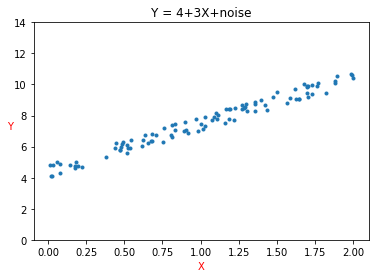

In [44]:
plt.scatter(X,Y,marker='.')
plt.title('Y = 4+3X+noise')
plt.ylim(ymin=0,ymax=14)
plt.xlabel('X',color='r')
plt.ylabel('Y',rotation=0,color='r')

In [51]:
X_b=np.c_[np.ones((100,1)),X] ## add X0 =1 to each instance

In [283]:
X_b.shape

(100, 2)

In [293]:
X_b[0:1]

array([[1.        , 1.84837439]])

In [42]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [82]:
theta_best

array([[4.41174248],
       [3.08610453]])

In [83]:
theta_best.shape

(2, 1)

In [323]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 =1 to each instance
print(X_new)

[[0]
 [2]]


In [324]:
print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [58]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.41174248],
       [10.58395153]])

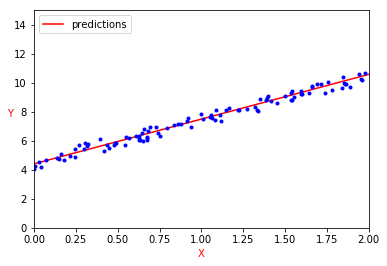

In [73]:
plt.plot(X_new, y_predict, "r-", label='predictions')
plt.legend(loc='upper left')
plt.plot(X,Y,"b.")
plt.axis([0,2,0,15])
plt.xlabel('X',color='r')
plt.ylabel('Y',rotation=0,color='r')
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lin_reg = LinearRegression()

In [78]:
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
lin_reg.intercept_, lin_reg.coef_

(array([4.40685624]), array([[3.05520544]]))

In [81]:
lin_reg.predict(X_new)

array([[ 4.40685624],
       [10.51726712]])

## Batch Gradient Descent

In [330]:
eta = 0.1 #learning rate

In [331]:
n_iterations = 1000

In [332]:
m = 100

In [333]:
theta = np.random.randn(2,1) # random initialization
theta

array([[-0.54412544],
       [ 1.41894951]])

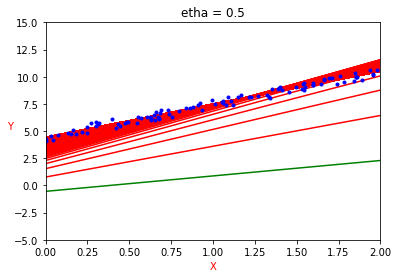

In [334]:
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "g")
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-Y)
    theta = theta - eta*gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "r-")
plt.plot(X,Y,"b.")
plt.axis([0,2,-5,15])
plt.xlabel('X',color='r')
plt.ylabel('Y',rotation=0,color='r')
plt.title('etha = 0.5')
plt.show()

In [335]:
theta

array([[4.40685624],
       [3.05520544]])

## Stochastic Gradient Descent

In [311]:
n_ephocs = 50

In [312]:
t0, t1 = 5,50 # learning schedule hyperparameters

In [313]:
def learning_schedule(t):
    return t0/(t + t1)

In [314]:
theta = np.random.randn(2,1) #random initialization

In [315]:
#for epoch in range(n_ephocs):
#    for i in range(m):
#        random_index = np.random.randint(m)
#        xi = X_b[random_index:random_index+1]
#        yi = Y[random_index:random_index+1]
#        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
#        eta = learning_schedule(epoch*m + i)
#        theta = theta - eta*gradients

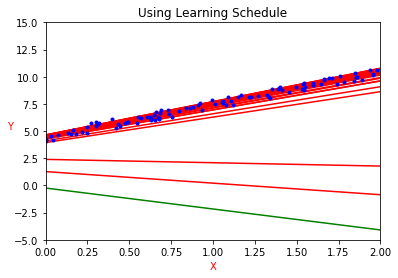

In [316]:
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "g")
for epoch in range(n_ephocs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")    
plt.plot(X,Y,"b.")
plt.axis([0,2,-5,15])
plt.xlabel('X',color='r')
plt.ylabel('Y',rotation=0,color='r')
plt.title('Using Learning Schedule')
plt.show()

In [309]:
print(eta)

0.0009902951079421667


In [310]:
from sklearn.linear_model import SGDRegressor

In [318]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [319]:
sgd_reg.fit(X,Y.ravel()) # .ravel() returns a contiguous flattened array.

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [320]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39986803]), array([3.04729396]))